In [5]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset split
output_base_path_aksarala = r'D:\Proyek Aksara 2\Datasets_split_aksarala'

# Memuat MobileNet sebagai model dasar (tanpa lapisan klasifikasi)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense untuk klasifikasi
predictions = Dense(33, activation='softmax')(x)  

# Menggabungkan model dasar MobileNet dengan lapisan klasifikasi yang baru
model = Model(inputs=base_model.input, outputs=predictions)

# Menyatakan bahwa lapisan dasar MobileNet tidak akan dilatih
for layer in base_model.layers:
    layer.trainable = False

# Compile model dengan optimizer Adam dan loss function categorical crossentropy
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 64, 64, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 32, 32, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 32, 32, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 32, 32, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 32, 32, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,262,689 (12.45 MB)

 Trainable params: 33,825 (132.13 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [6]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksarala, 'train')
test_dir = os.path.join(output_base_path_aksarala, 'test')

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 2739 images belonging to 33 classes.


Found 1221 images belonging to 33 classes.


In [23]:
import os

# Path dataset split
output_base_path_aksarala = r'D:\Proyek Aksara 2\Datasets_split_aksarala'
train_dir = os.path.join(output_base_path_aksarala, 'train')

# Ambil list nama subfolder di dalam direktori train (ini akan menjadi nama kelas/label)
classes = sorted(os.listdir(train_dir))

# Tampilkan kelas
print("Kelas yang ada dalam dataset:")
for idx, cls in enumerate(classes):
    print(f"{idx + 1}. {cls}")


Kelas yang ada dalam dataset:
1. ba
2. bha
3. ca
4. cha
5. da
6. dha
7. ga
8. gha
9. ha
10. ja
11. jha
12. ka
13. kha
14. la
15. ma
16. na
17. pa
18. pha
19. ra
20. sa
21. ta
22. tha
23. va
24. ya
25. ña
26. śa
27. ḍa
28. ḍha
29. ṅa
30. ṇa
31. ṣa
32. ṭa
33. ṭha


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 970ms/step - accuracy: 0.1995 - loss: 3.2370 - val_accuracy: 0.7559 - val_loss: 1.1777
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 356ms/step - accuracy: 0.7436 - loss: 1.2068 - val_accuracy: 0.8878 - val_loss: 0.6244
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - accuracy: 0.8671 - loss: 0.7726 - val_accuracy: 0.9378 - val_loss: 0.4185
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.8941 - loss: 0.5874 - val_accuracy: 0.9517 - val_loss: 0.3258
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.9072 - loss: 0.4744 - val_accuracy: 0.9607 - val_loss: 0.2623
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.9290 - loss: 0.3968 - val_accuracy: 0.9640 - val_loss: 0.2260
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 307ms/step - accuracy: 0.9284 - loss: 0.3524 - val_accuracy: 0.9640 - val_loss: 0.2032
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.9285 - loss: 0.3327 - val_accu

In [8]:
final_accuracy = history.history['val_accuracy'][-1]
print(f'Akurasi akhir model: {final_accuracy}')


Akurasi akhir model: 0.977886974811554


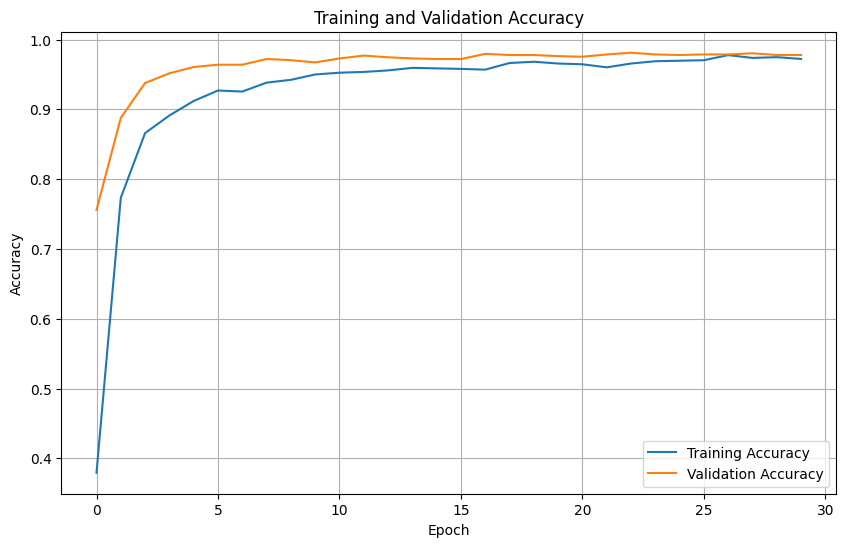

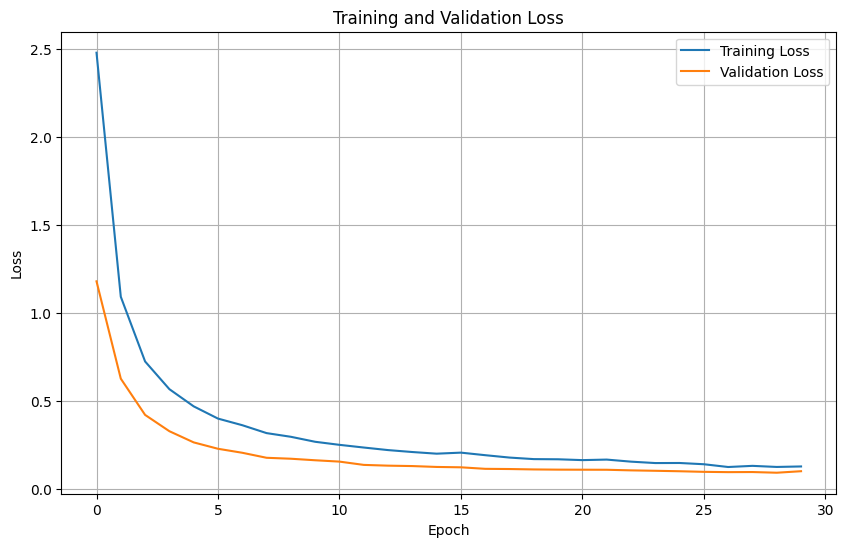

In [9]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# # Save the model
model.save('aksaraPallawaMobileNet_classifier_model.h5')

In [24]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Load the model
model = load_model('D:\\Proyek Aksara 2\\Model Aksarala\\aksaraPallawaMobileNet_classifier_model.h5')

# Class labels
class_labels = ['ba', 'bha', 'ca', 'cha', 'da', 'dha', 'ga', 'gha', 'ha', 'ja', 'jha', 'ka', 'kha', 'la', 'ma', 'na', 'pa', 'pha', 'ra', 'sa', 'ta', 'tha', 'va', 'ya', 'ña', 'śa', 'ḍa', 'ḍha', 'ṅa', 'ṇa', 'ṣa', 'ṭa', 'ṭha']

# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debug: Print raw predictions
    predicted_class_idx = np.argmax(predictions)
    print(f"Predicted class index: {predicted_class_idx}")  # Debug: Print predicted class index
    predicted_class = class_labels[predicted_class_idx]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        print(f"Uploaded file: {uploaded_file}")  # Debug: Print uploaded file information
        content = uploaded_file['content']  # Access the content directly
        
        try:
            # Convert content to image array
            img = load_img(io.BytesIO(content), target_size=(128, 128))
            img_array = img_to_array(img)
            
            # Classify the uploaded image
            predicted_class = classify_image(img_array)
            
            # Display the uploaded image and classification result
            display_img = Image(value=content, format='png', width=300, height=300)
            result_label = Label(f'Classified as: {predicted_class}')
            display(VBox([display_img, result_label]))
        
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))
